In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import user, password, host
from pydataset import data
from scipy import stats


### Correlation


In [28]:
url1 = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
url2 = f'mysql+pymysql://{user}:{password}@{host}/employees'

query1 = '''
SELECT * FROM customers
'''

queryjoin = '''
SELECT * FROM employees e
JOIN salaries s
USING (emp_no)
JOIN titles t
USING (emp_no)
'''


In [29]:
tc_df = pd.read_sql(query1,url1)

In [142]:
emp_df = pd.read_sql(queryjoin,url2)

In [31]:
# I wanted to make sure salary and title was accurately portrayed, 
# using .head(20) the title results were static, 
# so I had to check the tail to see if that was just how that employee's time went
# or if it was a loading/joining issue.
emp_df.tail(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
4638487,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,45702,1996-12-26,1997-12-26,Senior Staff,1998-12-27,9999-01-01
4638488,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,46206,1997-12-26,1998-12-26,Senior Staff,1998-12-27,9999-01-01
4638489,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,47429,1998-12-26,1999-12-26,Senior Staff,1998-12-27,9999-01-01
4638490,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,49971,1999-12-26,2000-12-25,Senior Staff,1998-12-27,9999-01-01
4638491,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,51182,2000-12-25,2001-12-25,Senior Staff,1998-12-27,9999-01-01
4638492,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01
4638493,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27
4638494,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,42140,1994-12-27,1995-12-27,Staff,1993-12-27,1998-12-27
4638495,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,42357,1995-12-27,1996-12-26,Staff,1993-12-27,1998-12-27
4638496,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,45702,1996-12-26,1997-12-26,Staff,1993-12-27,1998-12-27


In [32]:
sleep_df = data('sleepstudy')

1. Use the telco_churn data. 
- Does tenure correlate with monthly charges? 
- Total charges? 
- What happens if you control for phone and internet service?


In [33]:
tc_df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,No,Yes,No,No,3,Yes,4,84.65,5377.8,No
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,No,1,Yes,1,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No


In [34]:
# The DB one is proper, but if loaded the csv, you'd want to 
# df.columns = df.columns.str.lower() to make them lowercase since Python is case sensitive.

Tenure and Monthly Charges:

- H0: There is no linear correalation between length of tenure and monthly charges.
- Ha: There is a linear correalation between length of tenure and monthly charges.

In [35]:
#Pre-set values:
n = tc_df.shape[0]
deg_freedom = n - 2
conf_interval = .95
alf = 1 - conf_interval # same as alf = .05, alf is a personal touch for Alpha, it was the nickname of a beloved pet, and Alpha reminds me of it.

In [50]:

x = tc_df.tenure
y = tc_df.monthly_charges


In [51]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.2468617666408935, 3.9898213232673846e-98)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


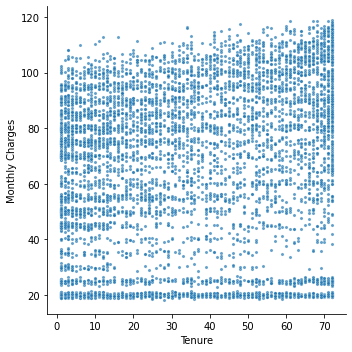

In [52]:
sns.relplot(x,y, s=10, alpha=.7)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

In [53]:
corr, p = stats.spearmanr(x,y, axis=None)
corr, p

(0.2753387429197595, 1.535767470847339e-122)

Correlation Coefficent:

    Measured between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.

In [54]:
round(corr, 3)

0.275

0.276 is closer to 0 than either 1 or -1, so if there is a correlation, it is weaker at best. The above scatter plot shows that Tenure and Monthly Charges are fairly evenly distributed across the board. The clusters around the lower end of monthly charges are most likely being affected by something else, and they're still uniform across length of tenure.

Tenure and Total Charges:

- H0: There is no linear relationship between Tenure and Total Charges.
- Ha: There is a linear relationship between Tenure and Total Charges.

In [55]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   senior_citizen            7032 non-null   int64  
 3   partner                   7032 non-null   object 
 4   dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   phone_service             7032 non-null   object 
 7   multiple_lines            7032 non-null   object 
 8   internet_service_type_id  7032 non-null   int64  
 9   online_security           7032 non-null   object 
 10  online_backup             7032 non-null   object 
 11  device_protection         7032 non-null   object 
 12  tech_support              7032 non-null   object 
 13  streaming_tv              7032 non-null   object 
 14  streamin

In [56]:
# tc_df = tc_df.dropna() wasn't working, so a little creative workaround was needed. 
# Apparently I actually need more things before I can .dropna() so, this is quicker [imo] as long as it works for all the odd values.
tc_df = tc_df[tc_df.total_charges != ' ']

In [57]:
x = tc_df.tenure
y = tc_df.total_charges

In [58]:
y = y.astype(float)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


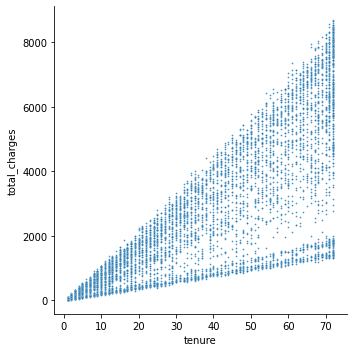

In [60]:
sns.relplot(x,y, s= 3, alpha=.8)
plt.show()

Heteroscedasticity is what this change rate is called, it's where it is clustered on one end, and tappered on the other. Homoscedasticity is the opposite which it's clustered tightly the whole way.

In [61]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.8891770805365491, 0.0)

In [62]:
round(corr, 2)

0.89

Correlation is ~.89, since it's closest to 1, it's a stronger positive correlation!

In [63]:
if p < alf:
    print("We reject the Null Hypothosis.")
else:
    print("We cannot reject the Null Hypothosis")

We reject the Null Hypothosis.


Using Phone and Internet Services as a Control:

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


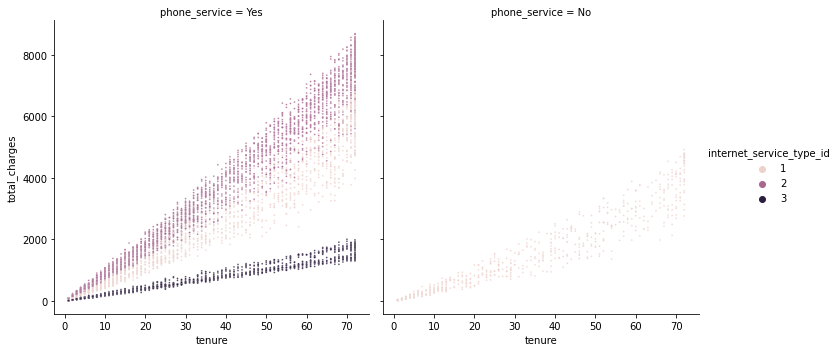

In [64]:
sns.relplot(x,y, s= 3, alpha=.8, col=tc_df.phone_service, hue=tc_df.internet_service_type_id)
plt.show()

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?



Use the sleepstudy data. Is there a relationship between days and reaction time?

Chi^2

In [94]:
index = ['Uses a Macbook', "Doesn't Use a Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
                       Codeup Student  Not Codeup Student
Uses a Macbook                     49                  20
Doesn't Use a Macbook               1                  30
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


- H_Null : Using a macbook is independent of being a Codeup Student
- H_A: Using a macbook is dependent upon being a Codeup Student

In [93]:

degf
nrows, ncols = observed.shape
deg_f = (nrows -1) * (ncols - 1)
if deg_f == degf:
    print(degf)

117


In [95]:
stats.chi2(degf).sf(chi2)

1.4116760526193828e-09

In [97]:
if p < alf:
    print("We reject the Null Hypothosis.")
else:
    print("We cannot reject the Null Hypothosis")

We reject the Null Hypothosis.


So being a codeup student is dependent with using a mac book

2. MPG

In [98]:
mpg = data('mpg')
# For Lesson they cleaned up transmisssion by creating a new column and filtering out the last 4 characters which were all the sub types of automatic/manual:
# mpg['transmission'] = mpg.trans.str[:-4]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [99]:
# Maybe we'll try Cylinder vs AVG MPG
mpg['avg_mpg'] = (mpg.hwy + mpg.cty)/ 2

In [100]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


- H_Null: Cynlinders have no bearing on average mpg.
- H_Alt: Cylinders are relative to average mpg.

In [101]:
n = mpg.shape[0]

cyl_proportions = mpg.cyl.value_counts() / n
cyl_proportions

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [102]:
avg_mpg_proportions = mpg.avg_mpg.value_counts() / n
avg_mpg_proportions

22.0    0.081197
15.0    0.072650
25.0    0.059829
15.5    0.055556
22.5    0.051282
23.5    0.047009
21.0    0.042735
20.5    0.042735
13.0    0.042735
17.0    0.038462
16.0    0.034188
19.5    0.034188
14.0    0.029915
23.0    0.025641
24.0    0.025641
18.0    0.025641
26.0    0.025641
10.5    0.021368
21.5    0.021368
20.0    0.021368
25.5    0.021368
16.5    0.021368
19.0    0.017094
30.5    0.017094
17.5    0.012821
18.5    0.012821
14.5    0.012821
13.5    0.012821
12.5    0.008547
27.0    0.008547
28.5    0.008547
30.0    0.008547
28.0    0.008547
27.5    0.004274
26.5    0.004274
32.5    0.004274
38.5    0.004274
39.5    0.004274
35.0    0.004274
24.5    0.004274
Name: avg_mpg, dtype: float64

In [103]:
observed = pd.crosstab(mpg.cyl, mpg.avg_mpg)
observed

avg_mpg,10.5,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,...,27.0,27.5,28.0,28.5,30.0,30.5,32.5,35.0,38.5,39.5
cyl,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,2,1,2,2,2,4,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,2,7,6,1,...,0,0,0,0,0,0,0,0,0,0
8,5,2,10,3,6,3,15,6,2,4,...,0,0,0,0,0,0,0,0,0,0


In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  1  0  2  2  1  4  9  4  8
   5  0 12  5  6  1  2  1  2  2  2  4  1  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  7  6  1  6  1  3  1  2  5  4  7  6  4 15  3  2  3
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  2 10  3  6  3 15  6  2  4  3  0  1  2  2  2  1  1  2  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
---
Expected

[[1.73076923 0.69230769 3.46153846 1.03846154 2.42307692 1.03846154
  5.88461538 4.5        2.76923077 1.73076923 3.11538462 1.03846154
  2.07692308 1.03846154 1.38461538 2.76923077 1.73076923 3.46153846
  3.46153846 1.73076923 6.57692308 4.15384615 2.07692308 3.80769231
  2.07692308 0.34615385 4.84615385 1.73076923 2.07692308 0.34615385
  0.69230769 0.34615385 0.69230769 0.69230769 0.69230769 1.38461538
  0.34615385 0.34615385 0.34615385 0.34615385]
 [0.08547009 0.03418

In [105]:
if p < alf:
    print("We reject the Null Hypothosis.")
else:
    print("We cannot reject the Null Hypothosis")

We reject the Null Hypothosis.


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


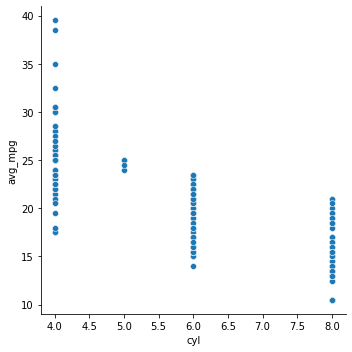

In [110]:
sns.relplot(mpg.cyl, mpg.avg_mpg)
plt.show()

So The amount of Cylinders DOES affect the average MPG. Looking at the chart you can see the more cylinders, the less average MPG.

3. Use the data from the employees database to answer these questions:


In [144]:
emp_df.columns = ['emp_no', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date', 'salary', 'sal_from_date', 'sal_to_date', 'title', 'title_from_date', 'title_to_date']
#fixing my dup column names.

In [145]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638507 entries, 0 to 4638506
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   emp_no           int64 
 1   birth_date       object
 2   first_name       object
 3   last_name        object
 4   gender           object
 5   hire_date        object
 6   salary           int64 
 7   sal_from_date    object
 8   sal_to_date      object
 9   title            object
 10  title_from_date  object
 11  title_to_date    object
dtypes: int64(2), object(10)
memory usage: 424.7+ MB


In [151]:
emp_df.head(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,sal_from_date,sal_to_date,title,title_from_date,title_to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01
5,10001,1953-09-02,Georgi,Facello,M,1986-06-26,71046,1991-06-25,1992-06-24,Senior Engineer,1986-06-26,9999-01-01
6,10001,1953-09-02,Georgi,Facello,M,1986-06-26,74333,1992-06-24,1993-06-24,Senior Engineer,1986-06-26,9999-01-01
7,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75286,1993-06-24,1994-06-24,Senior Engineer,1986-06-26,9999-01-01
8,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75994,1994-06-24,1995-06-24,Senior Engineer,1986-06-26,9999-01-01
9,10001,1953-09-02,Georgi,Facello,M,1986-06-26,76884,1995-06-24,1996-06-23,Senior Engineer,1986-06-26,9999-01-01


In [147]:
emp_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,sal_from_date,sal_to_date,title,title_from_date,title_to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01



- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)



- Is an employee's gender independent of whether or not they are or have been a manager?